In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# GOAL:  we are trying to find which features in the data have the highest impact on customer spend.

In [75]:
df = pd.read_csv("data.csv")

In [76]:
df.head()

,Unnamed: 0,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,...,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT,states,Region
0,0,010TUGIXZ95K5R,57,8,K,1970-01-01 00:00:00.000000000,85260,Y,2015-03-24 00:00:00.000000000,5059.97,...,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46,AZ,West
1,1,0109BPMLXNREXT,50,7,J,1970-01-01 00:00:00.000000306,20017,Y,2015-10-15 00:00:00.000000000,17353.28,...,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96,DC,South
2,2,0102I4L0PINZB3,54,11,E,1970-01-01 00:00:00.000001129,23233,Y,2017-07-11 00:00:00.000000000,4481.17,...,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97,VA,South
3,3,010QS307CAT5WJ,48,11,K,1970-01-01 00:00:00.000000204,23453,Y,2018-06-28 00:00:00.000000000,8312.67,...,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00,VA,South
4,4,0101EN5Q3W4AE8,32,9,K,1970-01-01 00:00:00.000000000,94108,Y,2019-07-12 00:00:00.000000000,6528.04,...,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00,CA,West


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                224647 non-null  int64  
 1   IID                       224647 non-null  object 
 2   AGE_                      224647 non-null  int64  
 3   INCOME                    224647 non-null  int64  
 4   ETHNIC_CODE_GROUP         224647 non-null  object 
 5   AN_BIRTHDAY               224647 non-null  object 
 6   POSTAL_CD                 224647 non-null  int64  
 7   LOYALTY_YN                224647 non-null  object 
 8   FIRST_ANTHRO_ORDER        224647 non-null  object 
 9   LIFETIME_APPAREL_DEMAND   224647 non-null  float64
 10  LIFETIME_APPAREL_ORDERS   224647 non-null  int64  
 11  ORDER_DT                  224647 non-null  object 
 12  ORDER_ID                  224647 non-null  object 
 13  ORDER_LINE_SEQ            224647 non-null  i

In [78]:
mycolumn = df["ETHNIC_CODE_GROUP"].value_counts()
mycolumn

K    144753
E     26470
A      9710
B      9466
L      8560
Z      6849
C      6109
G      5466
J      4789
I      1729
D       598
F       108
M        37
H         3
Name: ETHNIC_CODE_GROUP, dtype: int64

<AxesSubplot: >

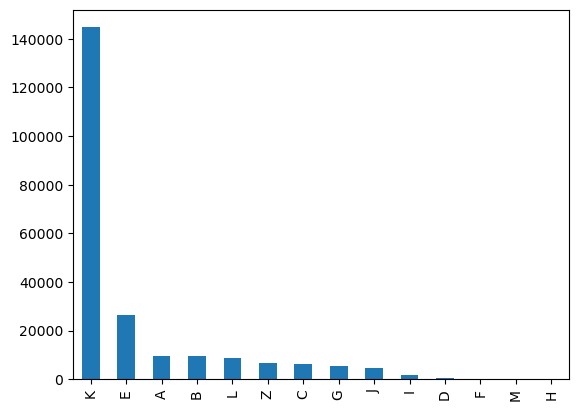

In [79]:
mycolumn.plot(kind="bar")

<AxesSubplot: ylabel='ETHNIC_CODE_GROUP'>

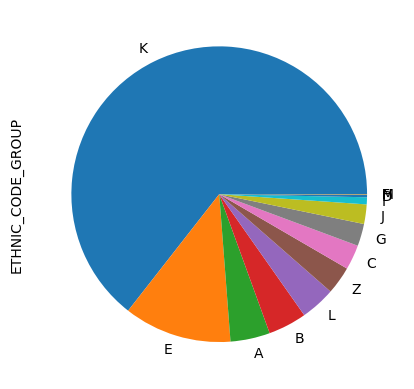

In [80]:
mycolumn.plot(kind="pie")

	VALUE	DESCRIPTION
	A	All African American
	B	Asian American 1
	C	Asian American 2
	D	Asian American 3
	E	Mediterranean
	F	Native American
	G	Scandinavian
	H	Polynesian
	I	Middle Eastern
	J	Jewish
	K	Western European
	L	Eastern European
	M	Miscellaneous - Other

In [81]:
# Filtering customers who visited more than once.

customer_frequency=df['IID'].value_counts()

customer_at_least_twice=customer_frequency[customer_frequency>1].index
customer_at_least_twice=list(customer_at_least_twice)
customer_at_least_twice

['010NNJ93E7VKUN',
 '0103IPXSGJD0X6',
 '010EAXG020328O',
 '010TPQOHLPTWWR',
 '010EF2O2JTXADL',
 '010P0OLCI368WG',
 '010P86L54YFI9B',
 '010C85LN8P8FNP',
 '010DO5W59TBX2I',
 '0113X2MODWB019',
 '010BJII4D0YBIX',
 '010AB0HK4R9RJA',
 '010AP6JC87A58U',
 '0100INEXMG9VLF',
 '010J9A8LGPOB87',
 '010SYAX2VA9SPQ',
 '010JP1HZS2KF16',
 '010MT2QDFMQJK1',
 '010H31WPJFS5GE',
 '010K4BIMGCTW7O',
 '0106SUXZQ8RMGM',
 '010OCEMWOKWCAV',
 '010YGG49KGXDGY',
 '010XOV3UC5J7N5',
 '010UUSEM265VTO',
 '010EEWJS9C15PO',
 '010C3G3CL8GC75',
 '01007WSI1HMG77',
 '010IH5HBN7JC78',
 '0109BPHS7VZOD5',
 '010VQNZYNXVJMH',
 '0100Z50HZVRUEK',
 '010CL32M9FOXMY',
 '0100GANDQZ0FCW',
 '010G1HO6T8CCZF',
 '010BKATQ0WE51U',
 '0115GW9C8RBQXP',
 '010TFBF6XSIRLL',
 '010JLDPL0NQZ4S',
 '0100N3BPPV0AJG',
 '010K2NSTO58YMC',
 '010YYN4M66CPPW',
 '01053ASY3ETM8S',
 '010FCK5VUAQRPB',
 '010G05P5166N05',
 '010NGCJNTFDLP3',
 '010GHB6MP3XY3O',
 '010YDSX8AAQYV4',
 '010V919PG0U0CI',
 '0104N0ANRN7EVY',
 '010RM2AKSCU9VO',
 '010X4UN35JC2Q4',
 '010UE4RNZC

In [82]:
customer_frequency[customer_frequency>1]

010NNJ93E7VKUN    8804
0103IPXSGJD0X6    1790
010EAXG020328O    1560
010TPQOHLPTWWR    1227
010EF2O2JTXADL    1076
                  ... 
010AKLZCDYQOJB       2
010Y0G7P1V6UY8       2
010R96ZYNN9FV8       2
010A6H7CCZPJFV       2
010AR3H3TJHCCW       2
Name: IID, Length: 8228, dtype: int64

In [83]:
df.dtypes

Unnamed: 0             int64
IID                   object
AGE_                   int64
INCOME                 int64
ETHNIC_CODE_GROUP     object
                      ...   
MD_STATE              object
DEMAND_QTY             int64
DEMAND_AMT           float64
states                object
Region                object
Length: 28, dtype: object

In [84]:
#Filtering customers who at least spent twice

df_twice=df.loc[df["IID"].isin(customer_at_least_twice)] [['IID', 'ETHNIC_CODE_GROUP', 'LIFETIME_APPAREL_DEMAND', 'POSTAL_CD']]
df_twice=df_twice.drop_duplicates(keep='first')
df_twice.shape

(8228, 4)

In [85]:
df_twice_agg=df_twice.groupby('ETHNIC_CODE_GROUP').median()['LIFETIME_APPAREL_DEMAND']

C:\Users\Owner\AppData\Local\Temp\ipykernel_28368\819409351.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_twice_agg=df_twice.groupby('ETHNIC_CODE_GROUP').median()['LIFETIME_APPAREL_DEMAND']


In [86]:
# AVERAGE SPEND PER ETHNIC GROUP
df_twice_agg.sort_values()

ETHNIC_CODE_GROUP
H     130.850
I    1430.170
E    1476.120
A    1561.325
G    1589.645
B    1921.515
Z    1954.980
L    1974.640
M    1988.030
K    2027.350
D    2068.230
C    2273.860
F    2350.710
J    2638.230
Name: LIFETIME_APPAREL_DEMAND, dtype: float64

<AxesSubplot: xlabel='ETHNIC_CODE_GROUP'>

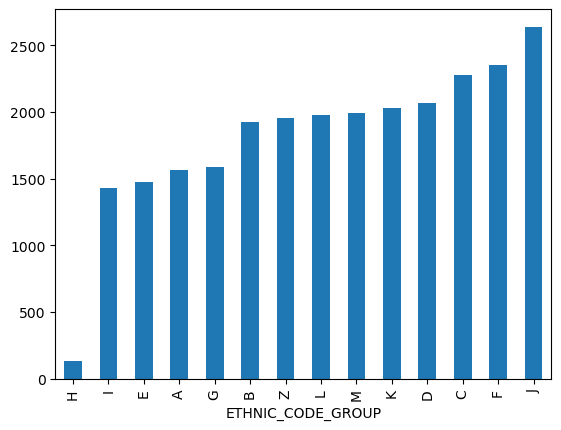

In [87]:
#Lifetime apparel demand
df_twice_agg.sort_values().plot(kind='bar')

In [88]:
#Looking at rel. btwn ethnic code and overall purchases which is money spent.
df.groupby('ETHNIC_CODE_GROUP')['DEMAND_AMT'].median()



ETHNIC_CODE_GROUP
A    59.20
B    48.00
C    55.96
D    60.00
E    58.80
F    50.50
G    59.97
H    19.95
I    49.97
J    68.00
K    59.97
L    58.00
M    20.40
Z    48.00
Name: DEMAND_AMT, dtype: float64

In [89]:
df_twice.groupby('POSTAL_CD')['ETHNIC_CODE_GROUP'].unique()

POSTAL_CD
1002     [K]
1033     [K]
1040     [K]
1060     [K]
1069     [K]
        ... 
99517    [G]
99523    [L]
99645    [L]
99801    [K]
99835    [G]
Name: ETHNIC_CODE_GROUP, Length: 4152, dtype: object

In [90]:
df_twice.groupby('POSTAL_CD')['ETHNIC_CODE_GROUP'].count()


POSTAL_CD
1002     3
1033     1
1040     1
1060     1
1069     1
        ..
99517    1
99523    1
99645    1
99801    1
99835    1
Name: ETHNIC_CODE_GROUP, Length: 4152, dtype: int64

In [91]:
#show more rows pd.set_option('display.max_rows', 500)

In [92]:
df_twice.groupby(['ETHNIC_CODE_GROUP', 'POSTAL_CD']).value_counts().sort_values()

ETHNIC_CODE_GROUP  POSTAL_CD  IID             LIFETIME_APPAREL_DEMAND
A                  1760       010UCJSVDW5HA3  2046.97                    1
K                  60048      01027CX42FUJI0  1049.89                    1
                              01141S0BAUU8Y0  2641.98                    1
                   60047      010A6RA0I782VG  1575.39                    1
                              010C0I28KF64ZT  971.06                     1
                                                                        ..
                   2186       010XLD31B4IVF5  1924.69                    1
                   2184       010R2JC4DIPA7P  2828.61                    1
                   2180       010PIF33G11RYL  2215.70                    1
                   2122       010KXL9847YTA7  11406.80                   1
Z                  99203      010EW3T2U4H9ZP  1252.66                    1
Length: 8228, dtype: int64

In [93]:
#Cross reference zip code and ethnic code

# POSTAL_CD 
# ETHNIC_CODE_GROUP 

df_postal=df_twice.groupby('POSTAL_CD').sort_values(by='ETHNIC_CODE_GROUP')
#.sort_values(ascending=False)

df_postal.head(20)



AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [94]:
df_twice

,IID,ETHNIC_CODE_GROUP,LIFETIME_APPAREL_DEMAND,POSTAL_CD
0,010TUGIXZ95K5R,K,5059.97,85260
1,0109BPMLXNREXT,J,17353.28,20017
2,0102I4L0PINZB3,E,4481.17,23233
3,010QS307CAT5WJ,K,8312.67,23453
4,0101EN5Q3W4AE8,K,6528.04,94108
...,...,...,...,...
210634,0115GFY2IB93E3,K,349.62,94618
215017,0101L94ZNDXP0R,E,640.66,19096
218034,0101X0UOJ3ZULX,K,208.00,77036
219796,0102INOBUDLRRX,K,328.00,80108
